## Variance Covariance Method

### Importing Libraries
Let us import the necessary libraries


In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Plotting 
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab

# Statistical calculation
from scipy.stats import norm

# Data fetching
import fix_yahoo_finance as yf

# Tabular data output
from tabulate import tabulate 

### Importing data and calculating daily returns



In [2]:
df = yf.download('FB', '2012-01-01','2018-01-31') 
df = df[['Close']]
df['returns'] = df.Close.pct_change()

[*********************100%***********************]  1 of 1 downloaded


### Calculating Value-at-Risk

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


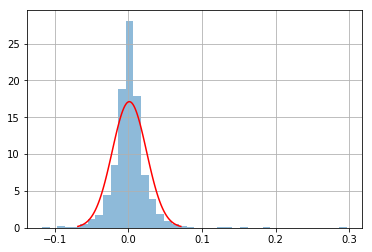

In [3]:
mean = np.mean(df['returns'])
std_dev = np.std(df['returns'])    

df['returns'].hist(bins=40, normed=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x,mlab.normpdf(x, mean, std_dev),"r")
plt.show()

In [4]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

print tabulate([['90%', VaR_90], ['95%', VaR_95], ["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk'])

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0284772
95%                      -0.0369394
99%                      -0.0528132


## Historical Simulation Method

### Importing data and calculating daily returns

[*********************100%***********************]  1 of 1 downloaded


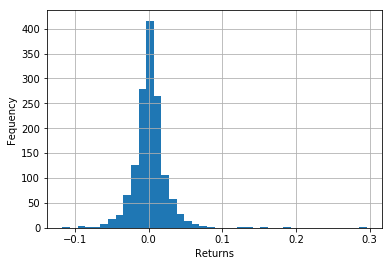

In [5]:
df = yf.download('FB', '2012-01-01','2018-01-31') 
df = df[['Close']]
df['returns'] = df.Close.pct_change()
df = df.dropna()
plt.hist(df.returns, bins=40)
plt.xlabel('Returns')
df.sort_values('returns', inplace= True, ascending = True)
plt.ylabel('Fequency')
plt.grid(True)
plt.show()

### Sorting the returns

In [6]:
df.sort_values('returns', inplace= True, ascending = True)

### Calculating Value-at-Risk

In [7]:
VaR_90= df['returns'].quantile(0.1)
VaR_95= df['returns'].quantile(0.05)
VaR_99= df['returns'].quantile(0.01)

print tabulate([['90%', VaR_90], ['95%', VaR_95], ["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk'])

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0218656
95%                      -0.0316054
99%                      -0.0575853
